# Basic Data Frame Processing with `dfply`

In [14]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [15]:
artists = pd.read_csv("./data/Artists.csv")
artwork = pd.read_csv("./data/Artworks.csv")

## `dplyr` like dateframe processing with `dfply`

* `select`: Pick columns
* `filter_by`: Pick rows
* `mutate`: Change/create columns

In [2]:
from dfply import *
(artists >>
   select(X.DisplayName, X.BeginDate, X.Nationality) >>
   mutate(years_since = X.BeginDate - 1945) >>
   filter_by(X.years_since > 10) >>
   head(5))

,DisplayName,BeginDate,Nationality,years_since
105,Harry Allen,1964,American,19
147,Monika Andersson,1957,Swedish,12
243,Donald Baechler,1956,American,11
286,Miquel Barcelo,1957,Spanish,12
323,Jean-Michel Basquiat,1960,American,15


## What's up with the `>>`?

<img src="img/dfply_piping.png" width = 400>

* `dfply` pipe operator
* Like `%>%` in `dplyr`
    * but not as universal

## What about the `X` thingy?

<img src="img/dfply_X_intention_1.png" width = 400>

* `dfply` pipe operator
* Like `%>%` in `dplyr`
    * but not as universal

## Why we need an Intention

<img src="img/dfply_X_intention_2.png" width=400>

Note that `years_since` doesn't exist until after the `mutate`

## <font color="red"> Exercise 1 </font>
    
**Task:** Replace `X` with `artist` and run the code.  Explain the resulting error.

In [3]:
(artists >>
   mutate(years_since = X.BeginDate - 1945) >>
   filter_by(X.years_since > 10) >>
   head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,years_since
105,119,Harry Allen,"American, born 1964",American,Male,1964,0,NaN,NaN,19
147,170,Monika Andersson,"Swedish, born 1957",Swedish,Female,1957,0,NaN,NaN,12
243,280,Donald Baechler,"American, born 1956",American,Male,1956,0,NaN,NaN,11
286,329,Miquel Barcelo,"Spanish, born 1957",Spanish,Male,1957,0,Q561930,500003657.0,12
323,370,Jean-Michel Basquiat,"American, 1960–1988",American,Male,1960,1988,Q155407,500093239.0,15


# Exploring and cleaning the MoMA data

In the previous lecture, we identified some errors

* Multiple instances of "Nationality unknown" in `artists.Nationality`
* `artist.BeginDate` is 0 $\rightarrow$ probably should be missing
* Parentheses in `artwork.BeginDate`
* Very large value in `artwork['Height (cm)']`

In this section, we will illustrate exploring and cleaning up these data with `select`, `filter_by` and `mutate`

## Renaming columns the `dfply` way

* We use `rename` to rename columns as part of a pipe.
* We can use `kwargs` to rename all columns at once

In [5]:
artists_renamed = artists >>rename(Wiki_QID = 'Wiki QID')
artists_renamed.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## Renaming all the columns at once

1. Make a translation dictionary
2. Pass to `rename` by unpacking keywords with `**`

## Step 1 - Translation dictionary

* keys: New name
* values: Old name

In [6]:
fix_col_name = lambda s: s.replace(' ', '_').replace('(', '').replace(')', '').replace('.', '')


new_cols = {fix_col_name(name):name 
            for name in artwork.columns}

new_cols

{'Title': 'Title',
 'Artist': 'Artist',
 'ConstituentID': 'ConstituentID',
 'ArtistBio': 'ArtistBio',
 'Nationality': 'Nationality',
 'BeginDate': 'BeginDate',
 'EndDate': 'EndDate',
 'Gender': 'Gender',
 'Date': 'Date',
 'Medium': 'Medium',
 'Dimensions': 'Dimensions',
 'CreditLine': 'CreditLine',
 'AccessionNumber': 'AccessionNumber',
 'Classification': 'Classification',
 'Department': 'Department',
 'DateAcquired': 'DateAcquired',
 'Cataloged': 'Cataloged',
 'ObjectID': 'ObjectID',
 'URL': 'URL',
 'ThumbnailURL': 'ThumbnailURL',
 'Circumference_cm': 'Circumference (cm)',
 'Depth_cm': 'Depth (cm)',
 'Diameter_cm': 'Diameter (cm)',
 'Height_cm': 'Height (cm)',
 'Length_cm': 'Length (cm)',
 'Weight_kg': 'Weight (kg)',
 'Width_cm': 'Width (cm)',
 'Seat_Height_cm': 'Seat Height (cm)',
 'Duration_sec': 'Duration (sec.)'}

## Step 2 - Unpack in `rename` 

In [8]:
artwork_renamed = (artwork >>
                     rename(**new_cols))
artwork_renamed.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

## Understanding `**kwargs` - Step 1

**Point 1:** functional parameters can be called as keywords

In [31]:
f = lambda x, y: x + y

f(x = 2, y = 3)

5

## Understanding `**kwargs` - Step 2

**Point 2:** We can "unpack" keywords from a dictionary

In [32]:
f = lambda x, y: x + y
f(x = 2, y = 3)

5

In [33]:
kwargs = {'x':2, 'y':3}
f(**kwargs) #--> f(x = 2, y = 3)

5

## What's happening here?

* Keys become keywords
    * quotes removed
* Values become arguments

In [34]:
f(**{'x':2, 'y':3}) #--> f(x = 2, y = 3)

5

## Or all at once

In [9]:
artwork_renamed = (artwork >>
                     rename(**{fix_col_name(name):name 
                               for name in artwork.columns}))
artwork_renamed.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference_cm', 'Depth_cm', 'Diameter_cm', 'Height_cm', 'Length_cm',
       'Weight_kg', 'Width_cm', 'Seat_Height_cm', 'Duration_sec'],
      dtype='object')

## We love referential transparency!

<img src="./img/ref_trans.png" width=600>

In pure, functional programs code can replaced with its value.  This makes programs easier to understand.

## <font color="red"> Exercise 2 </font>

<img src="./img/ref_trans.png" width=600>

**Task:** Compare and contrast the two versions.  Discuss the relative merits of each.

*Your thoughts here*

## Example 1 - Problems with `artist.Nationality`

In [35]:
artists.Nationality.value_counts()

American               5454
German                  976
French                  898
British                 872
Italian                 554
Japanese                509
Swiss                   294
Dutch                   270
Russian                 259
Austrian                248
Nationality unknown     209
Canadian                207
Brazilian               177
Spanish                 158
Argentine               151
Mexican                 135
Polish                  135
Swedish                 134
Danish                  121
Chinese                  97
Belgian                  95
Czech                    85
Israeli                  79
Chilean                  74
Cuban                    70
South African            70
Australian               65
Finnish                  63
Hungarian                55
Venezuelan               52
                       ... 
Nationality Unknown       2
Various                   2
Rwandan                   1
Armenian                  1
Mozambican          

## Step 1 - Identify the instances

#### Probably to do with case $\rightarrow$ make lower

In [36]:
artists.Nationality.str.lower()

0          american
1           spanish
2          american
3          american
4            danish
5           italian
6          american
7          american
8          american
9            french
10         estonian
11          mexican
12          swedish
13          spanish
14              NaN
15         american
16         american
17          israeli
18          british
19         american
20         american
21          swedish
22          swedish
23           french
24          italian
25         american
26           french
27         american
28          finnish
29          finnish
            ...    
15787         cuban
15788       chilean
15789     brazilian
15790     burkinabe
15791        french
15792      american
15793      american
15794      american
15795     argentine
15796      american
15797      american
15798      american
15799      american
15800     hungarian
15801      american
15802           NaN
15803      american
15804       serbian
15805      american


#### Now check to see if they start with `"nation"`

In [37]:
artists.Nationality.str.lower().str.startswith('nation') # Notice this is dtype object

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14         NaN
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
15787    False
15788    False
15789    False
15790    False
15791    False
15792    False
15793    False
15794    False
15795    False
15796    False
15797    False
15798    False
15799    False
15800    False
15801    False
15802      NaN
15803    False
15804    False
15805    False
15806    False
15807    False
15808    False
15809    False
15810    False
15811    False
15812    False
15813      NaN
15814    False
15815    False
15816    False
Name: Nationality, Length: 15817, dtype: object

#### `filter_by` requires a Boolean expression $\rightarrow$ change type with `astype`

In [15]:
artists.Nationality.str.lower().str.startswith('nation').astype('bool')

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14        True
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
15787    False
15788    False
15789    False
15790    False
15791    False
15792    False
15793    False
15794    False
15795    False
15796    False
15797    False
15798    False
15799    False
15800    False
15801    False
15802     True
15803    False
15804    False
15805    False
15806    False
15807    False
15808    False
15809    False
15810    False
15811    False
15812    False
15813     True
15814    False
15815    False
15816    False
Name: Nationality, Length: 15817, dtype: bool

## Use this expression with `X` and `filter_by`

In [16]:
artists >> filter_by(X.Nationality.str.lower().str.startswith('nation').astype('bool'))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
14,18,Artko,NaN,NaN,NaN,0,0,NaN,NaN
123,142,M. Ameen,Nationality unknown,Nationality unknown,NaN,0,0,NaN,NaN
173,201,Aoki Toshio,NaN,NaN,NaN,0,0,NaN,NaN
191,222,F. Armbruster,Nationality unknown,Nationality unknown,NaN,0,0,NaN,NaN
209,242,Keith James Aulik,Nationality unknown,Nationality unknown,Male,0,0,NaN,NaN
465,525,Palme Berthold,NaN,NaN,NaN,0,0,NaN,NaN
481,541,Art Bevacqua,Nationality unknown,Nationality unknown,Male,0,0,NaN,NaN
520,583,Roman Black,Nationality unknown,Nationality unknown,Male,0,0,NaN,NaN
535,601,Blessum,Nationality unknown,Nationality unknown,NaN,0,0,NaN,NaN
536,602,André Bloc,"Nationality unknown, 1896–1966",Nationality unknown,Male,1896,1966,NaN,NaN


## Summary

* String methods are proceed with `str`
    * Example `s.lower().replace('.', '')` becomes `X.str.lower().str.replace('.', '')`
* Explore an expression on actual dataframe, then replace with `X`
* Wrap a piped expression in `()` to spread over many lines

## Use `pull` to grab a specific column

In [38]:
bad_lbls = (artists >> 
             filter_by(X.Nationality.str.lower().str.startswith('nation').astype('bool')) >>
             pull('Nationality')).unique()
bad_lbls

array([nan, 'Nationality unknown', 'Nationality Unknown',
       'nationality unknown'], dtype=object)

## Making a translation dictionary

First step in recoding data is making a translation dictionary

In [39]:
recode_bad_lbls = {old_lbl:'Nationality unknown' for old_lbl in bad_lbls}
recode_bad_lbls

{nan: 'Nationality unknown',
 'Nationality unknown': 'Nationality unknown',
 'Nationality Unknown': 'Nationality unknown',
 'nationality unknown': 'Nationality unknown'}

## Recoding the bad labels using the `replace` method

* `Series` have `replace`
    * takes a dictionary
    * replaces keys with values

In [40]:
artists_new = (artists >>
                mutate(Nationality = X.Nationality.replace(recode_bad_lbls)))

In [41]:
(artists_new >>
   filter_by(X.Nationality.str.lower().str.startswith('nation').astype('bool')) >>
   pull('Nationality')).unique()

array(['Nationality unknown'], dtype=object)

## Example 2 - Zeros $\rightarrow$ `np.Nan`

Recall that `artists.BeginDate` had lots of zeros

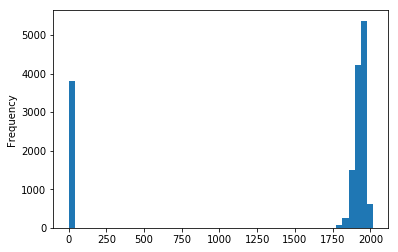

In [44]:
import matplotlib.pylab as plt
artists_renamed.BeginDate.plot('hist', bins = 50)

## Cases with `BeginDate != 0`

Start by looking at the correct cases.  Take note of the `ArtistBio`

In [45]:
(artists_renamed >>
  filter_by(X.BeginDate != 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN


## Cases with `BeginDate == 0`

Note the date in the `ArtistBio` $\rightarrow$ pretty clear this is missing data

In [46]:
(artists_renamed >>
  filter_by(X.BeginDate == 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN
14,18,Artko,NaN,NaN,NaN,0,0,NaN,NaN
17,22,Isidora Aschheim,Israeli,Israeli,Female,0,0,NaN,NaN
26,32,Atelier Eggers,French,French,NaN,0,0,NaN,NaN
27,33,A.A.P.,American,American,NaN,0,0,NaN,NaN
47,55,Norman Ackroyd,British,British,Male,0,0,Q7051892,500029028.0


## The solution: Replace 0 with `np.NaN`

In [11]:
replace_zero = {0:np.NaN}
artists_new = (artists_renamed >>
                mutate(BeginDate = X.BeginDate.replace(replace_zero)))

## Verify that it works

In [12]:
(artists_new >>
  filter_by(X.BeginDate == 0) >>
  head(5))

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki_QID,ULAN


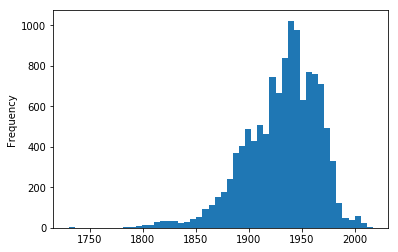

In [16]:
artists_new.BeginDate.plot('hist', bins = 50)

## Next Up

Now you should be ready to tackle [Lab 1](./lab_1_cleaning_up_the_MoMA_artwork.ipynb), which focuses on cleaning up the MoMA artwork file.